<div style="background-color:#003366; color:#FFFFFF; padding: 15px; border-radius: 5px;">
Análise do mercado de aplicativos de carro -- Projeto Zuber
</div>

In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


<div style="background-color:#66B2FF; color:#FFFFFF; padding: 15px; border-radius: 5px;">
>> Pré - processamento de Dados             
</div>

**Analisando o arquivo : sprint07-arquivo-I.csv**

In [88]:
# df = pd.read_csv('sprint07-arquivo-I.csv')

O arquivo acima não estava sendo lido, pois algumas linhas continham mais de uma vírgula, de modo que o pandas não estava conseguindo identificar que tínhamos apenas 02 colunas. 
Abaixo temos o passo a passo para resolver, lendo o arquivo da esquera para direita, de modo que ele pare na primeira virgula.

In [89]:
# 1. Lê o arquivo como uma única coluna.
#    O sep='|' é usado porque este caractere não existe no arquivo,
#    forçando o pandas a ler cada linha como uma única string.
df_temp = pd.read_csv('sprint07-arquivo-I.csv', sep='|', header=None, skiprows=1)

# 2. Divide a única coluna em duas.
#    O .rsplit(',', n=1) divide a string a partir da direita,
#    encontrando a última vírgula e usando-a como separador.
df1 = df_temp[0].str.rsplit(',', n=1, expand=True)

# 3. Adiciona os nomes das colunas ao novo DataFrame
df1.columns = ['dropoff_location_name', 'average_trip'].copy()

In [90]:
display(df1.head(10))

,dropoff_location_name,average_trip
0,Loop,10727.466666666667
1,River North,9523.666666666666
2,Streeterville,6664.666666666667
3,West Loop,5163.666666666667
4,O'Hare,2546.9
5,Lake View,2420.9666666666667
6,Grant Park,2068.5333333333333
7,Museum Campus,1510.0
8,Gold Coast,1364.2333333333333
9,Sheffield & DePaul,1259.7666666666667


In [91]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trip           94 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB
None


Não temos nulos, porém o Dtype da coluna com a média das viagens precisa ser alterada para o tipo float

In [92]:
df1['average_trip'] = df1['average_trip'].astype(float)  # Convertendo a coluna para float  
#print(df1.info())   #apenas checando se a alteração foi feita  

Analisando se há duplicados

In [93]:
print(df1.duplicated().sum())

0


Não há linhas duplicadas. Tudo ok com a análise prévia desta primeira tabela

**Analisando o arquivo : sprint07-arquivo-II.csv**

In [94]:
#df = pd.read_csv('sprint07-arquivo-II.csv')
# Mesma situação do primeiro arquivo. Precisamos tratar a leitura.  

O arquivo acima não estava sendo lido, pois algumas linhas continham mais de uma vírgula, de modo que o pandas não estava conseguindo identificar que tínhamos apenas 02 colunas. 
Abaixo temos o passo a passo para resolver, lendo o arquivo da esquera para direita, de modo que ele pare na primeira vírgula.

In [95]:
# 1. Lê o arquivo como uma única coluna.
#    O sep='|' é usado porque este caractere não existe no arquivo,
#    forçando o pandas a ler cada linha como uma única string.
df_temp = pd.read_csv('sprint07-arquivo-II.csv', sep='|', header=None, skiprows=1)

# 2. Divide a única coluna em duas.
#    O .rsplit(',', n=1) divide a string a partir da direita,
#    encontrando a última vírgula e usando-a como separador.
df2 = df_temp[0].str.rsplit(',', n=1, expand=True)

# 3. Adiciona os nomes das colunas ao novo DataFrame
df2.columns = ['company_name', 'trips_amount']

In [96]:
display(df2.head(10))   

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [97]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None


Ausência de nulos, porém o Dtype da coluna com a soma das viagens, precisa ser corrigida para numero inteiro - int

In [98]:
df2['trips_amount'] = df2['trips_amount'].astype(int)  # Convertendo a coluna para int  
#print(df2.info())   #apenas checando se a alteração foi feita  

Verificando se há linhas duplicadas

In [99]:
print(df2.duplicated().sum())

0


Ausência de linhas duplicadas. Tudo ok com ambas tabelas. 

<div style="background-color:#66B2FF; color:#FFFFFF; padding: 15px; border-radius: 5px;">
>> Análise Exploratória  
    
</div>

Abaixo ilustra os 10 principais bairros de destinho dos passageiros - dados do mês de novembro de 2017.

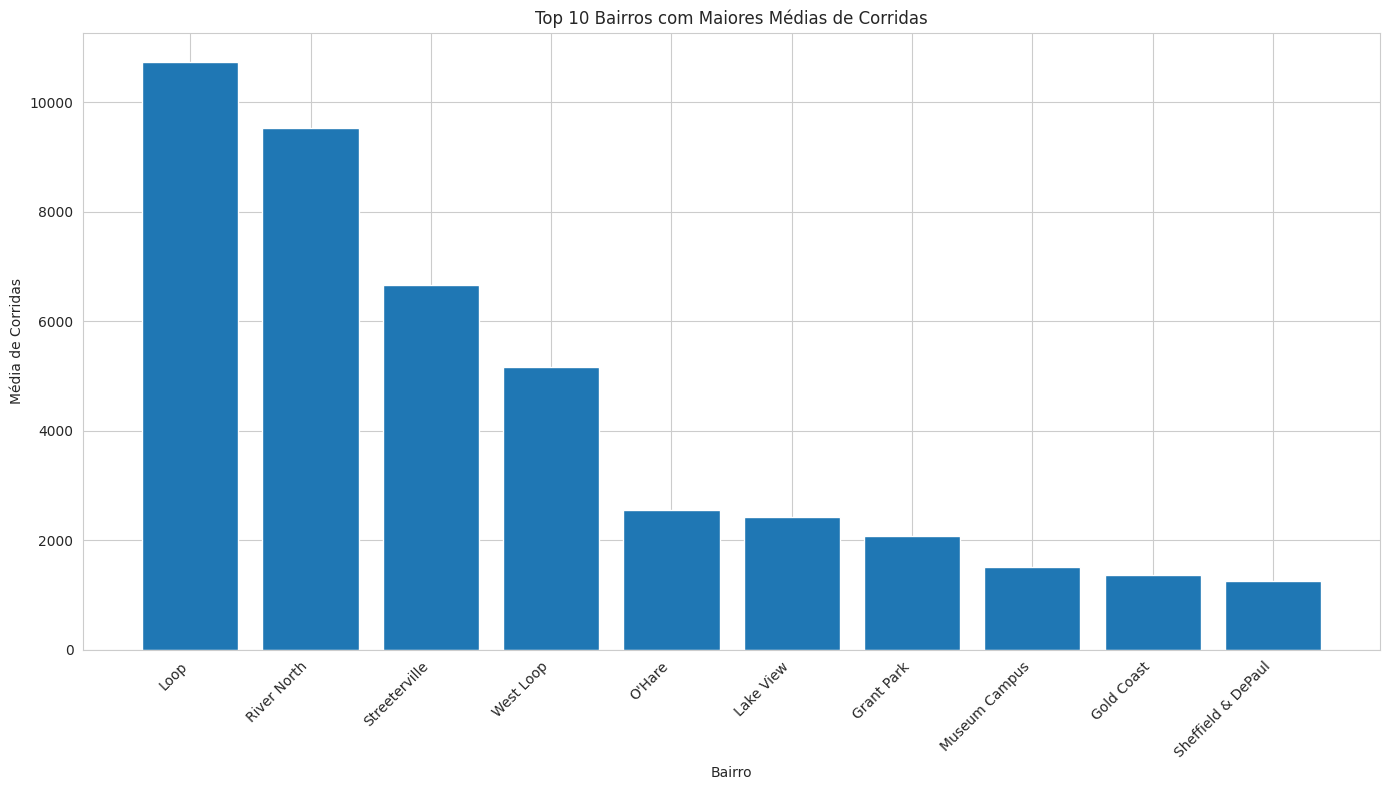

In [105]:
# 1.Ordena o DataFrame pela coluna 'average_trips' em ordem decrescente
df_ordenado = df1.sort_values(by='average_trip', ascending=False).reset_index()

# 2. Seleciona os 10 primeiros bairros
df_top10 = df_ordenado.head(10) 

# 3. Cria o gráfico de barras
plt.figure(figsize=(14, 8)) # Define o tamanho da figura
plt.bar(df_top10['dropoff_location_name'], df_top10['average_trip'])

# Adiciona título e rótulos aos eixos
plt.title('Top 10 Bairros com Maiores Médias de Corridas')
plt.xlabel('Bairro')
plt.ylabel('Média de Corridas')

# Rotaciona os nomes dos bairros para facilitar a leitura
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta o layout para evitar cortes 
plt.show() # Exibe o gráfico    

O Gráfico nos apresenta a média dos 10 maiores destinos de corridas por carros por aplicativo. 

Causa impacto observar que existem 02 destinos que estão bem a frente dos demais, sendo eles os bairros: 

- Loop com aproximadamente 11 mil corridas e River North com 9.500 corridas 

**Análise das empresas de aplicativos de carros e o total de corridas praticadas no intervalo de tempo de 15 e 16 de novembro de 2017.**

In [115]:
print(df2.size) #verificando quantas empresas temos no total

128


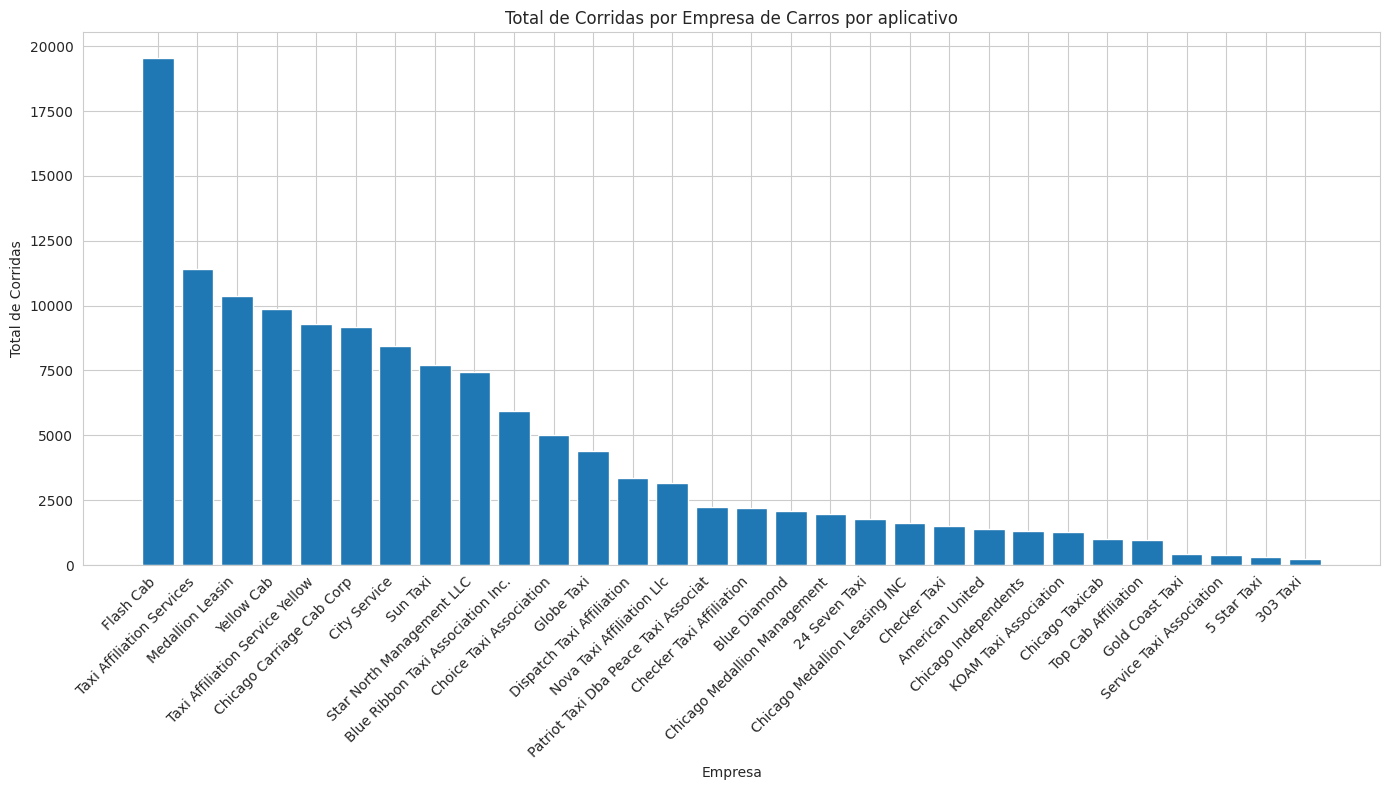

In [113]:
# 1.Ordena o DataFrame pela coluna 'average_trips' em ordem decrescente
df_ordenado = df2.sort_values(by='trips_amount', ascending=False).reset_index()

# 2. Seleciona uma fatia de empresas que estão ativas no mercado
df_top30 = df_ordenado.head(30) 

# 3. Cria o gráfico de barras
plt.figure(figsize=(14, 8)) # Define o tamanho da figura
plt.bar(df_top30['company_name'], df_top30['trips_amount'])

# Adiciona título e rótulos aos eixos
plt.title('Total de Corridas por Empresa de Carros por aplicativo')
plt.xlabel('Empresa')
plt.ylabel('Total de Corridas')

# Rotaciona os nomes dos bairros para facilitar a leitura
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta o layout para evitar cortes 
plt.show() # Exibe o gráfico    

Estamos analisando um período de 02 dias, sendo eles 15 e 16 de novembro de 2017.

Os nossos dados compreendem  128 empresas de carros de transportes ao todo. Porém grande parte delas com números insignificantes, muito próximos de zero. Sendo assim, acima podemos observar o total de 30 empresas.

Sendo as 04 ultimas mencionadas (Gold Coast Taxi em diante) com menos de 300 corridas.

É nítido a liderança da empresa Flash Cab com aproximadamente 20 mil corridas, sendo que a próxima empresa lider em corridas, tem quase a metade de corridas, Taxi Affiliation Services, conta com 11422 corridas.

<div style="background-color:#66B2FF; color:#FFFFFF; padding: 15px; border-radius: 5px;">
>> Análise Estatística  

</div>

<div style="background-color:#003366; color:#FFFFFF; padding: 15px; border-radius: 5px;">
                    Conclusões              
</div> 